In [2]:
import pandas as pd
import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [3]:
os.getcwd()

'/Users/radek'

In [4]:
os.chdir("/Users/radek/PycharmProjects/pythonProject")

In [5]:
X = pd.read_csv(os.path.join('data','train_data.csv'), header=None)
y = pd.read_csv(os.path.join('data','train_labels.csv'), header=None, names=['y'])
y = y['y'].apply(lambda x: 1 if x == -1 else 0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812 entries, 1936 to 1997
Columns: 10000 entries, 0 to 9999
dtypes: float64(10000)
memory usage: 214.6 MB


In [8]:
y.value_counts()

0    3375
1     375
Name: y, dtype: int64

In [9]:
X_train.isnull().sum().sum()


0

In [10]:
X_train.duplicated().sum()

0

In [11]:
y_train.value_counts()

0    2531
1     281
Name: y, dtype: int64

In [12]:
y_train.isnull().sum()

0

In [1]:
#sns.boxplot(y_train)

In [14]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.00000,2812.000000,2812.000000,2812.000000,2812.000000,...,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,33.031349,9.924578,216.073356,918.820528,-341.331160,22.18367,29.727296,21.325995,12.165565,13.323071,...,13.680782,17.015448,24.725212,8.243626,25.779983,-2.345528,12.570530,10.164855,4.026635,27.175890
std,285.421336,213.175360,42935.976260,56864.924410,22124.625702,711.06639,892.540746,874.775378,537.360933,237.152419,...,266.437170,549.464189,268.318799,499.779122,821.662075,656.192302,204.921813,790.753850,635.091144,760.572178
min,-989.450000,-859.922000,-163336.428000,-243844.632000,-77566.109000,-2414.19600,-2917.452000,-3151.321000,-1792.781000,-746.897000,...,-886.939000,-1983.009000,-937.357000,-1758.858000,-2526.791000,-2078.698000,-739.205000,-2731.037000,-2223.909000,-2565.513000
25%,-158.923750,-135.269750,-28739.864750,-37251.748250,-14951.915000,-459.32525,-582.140750,-557.425750,-355.518750,-145.677000,...,-168.862500,-361.758500,-154.405750,-338.460250,-547.331000,-431.100750,-128.514750,-559.055250,-422.057000,-471.214500
50%,36.391000,1.930500,1423.184500,1282.737500,-220.194500,10.17400,10.430000,3.605000,10.899000,7.552500,...,17.695000,33.614000,27.603000,9.877000,16.402500,-5.504000,14.474500,10.197000,7.845500,12.731000
75%,217.442000,158.121750,28840.386750,41066.354500,14863.862250,506.04775,621.208000,600.845500,376.033500,179.159500,...,194.799750,396.238500,199.276500,341.284500,597.966500,425.715000,154.260750,549.605250,433.715000,539.712250
max,1224.394000,722.868000,167427.242000,215372.854000,74388.159000,2430.43000,3118.087000,2966.971000,1914.308000,803.200000,...,893.196000,2079.587000,1070.453000,1705.664000,2868.989000,2562.331000,685.176000,3123.617000,2204.527000,2575.611000


<AxesSubplot:xlabel='9792', ylabel='Density'>

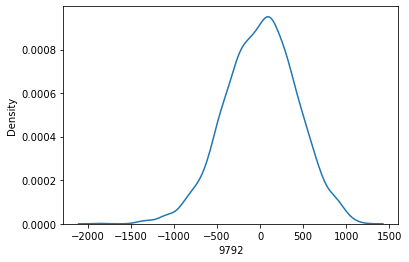

In [17]:
distr = X_train.skew().idxmin()
sns.kdeplot(pd.DataFrame(X_train)[distr])

<AxesSubplot:xlabel='2611', ylabel='Density'>

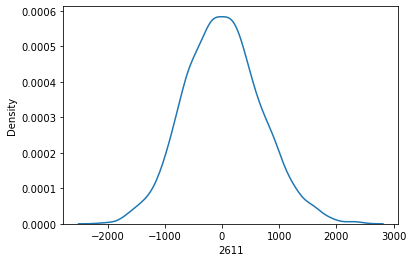

In [19]:
distr2 = X_train.skew().idxmax()
sns.kdeplot(pd.DataFrame(X_train)[distr2])

In [20]:
#def detect_outlier(data):
#    q1, q3 = np.percentile(sorted(data), [25, 75])
#    iqr = q3 - q1
#    lower_bound = q1 - (1.5 * iqr)
#    upper_bound = q3 + (1.5 * iqr)
#    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
#    return outliers
# 
#
#detect_outlier(X_train)

In [19]:
pca = PCA(n_components=2, whiten=True)

In [20]:
X2 = StandardScaler().fit_transform(X)

In [21]:
x2 = pca.fit_transform(X)

/Users/radek/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

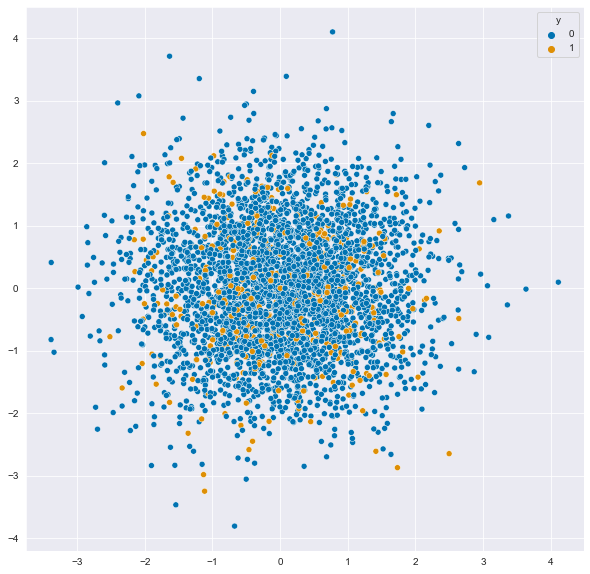

In [38]:
sns.set_palette('colorblind')
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.scatterplot(x2[:,0],
           x2[:,1], hue=y)

In [21]:
p = Pipeline([('pca',PCA(n_components=0.99)), ('tsne', TSNE(n_components=2))])

In [26]:
a = p.fit_transform(X)  

/Users/radek/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1440x1440 with 0 Axes>

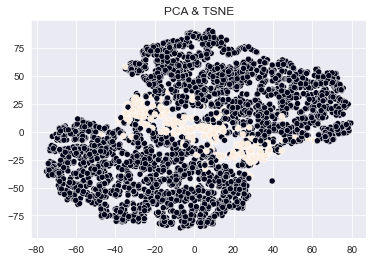

<Figure size 1440x1440 with 0 Axes>

In [27]:
sns.set_palette('colorblind')
sns.set_style('darkgrid')
sns.scatterplot(a[:,0], a[:,1], c=y)
plt.title(f'PCA & TSNE')
plt.figure(figsize=(20,20))